🔍 Plotting feature relationships before PCA...


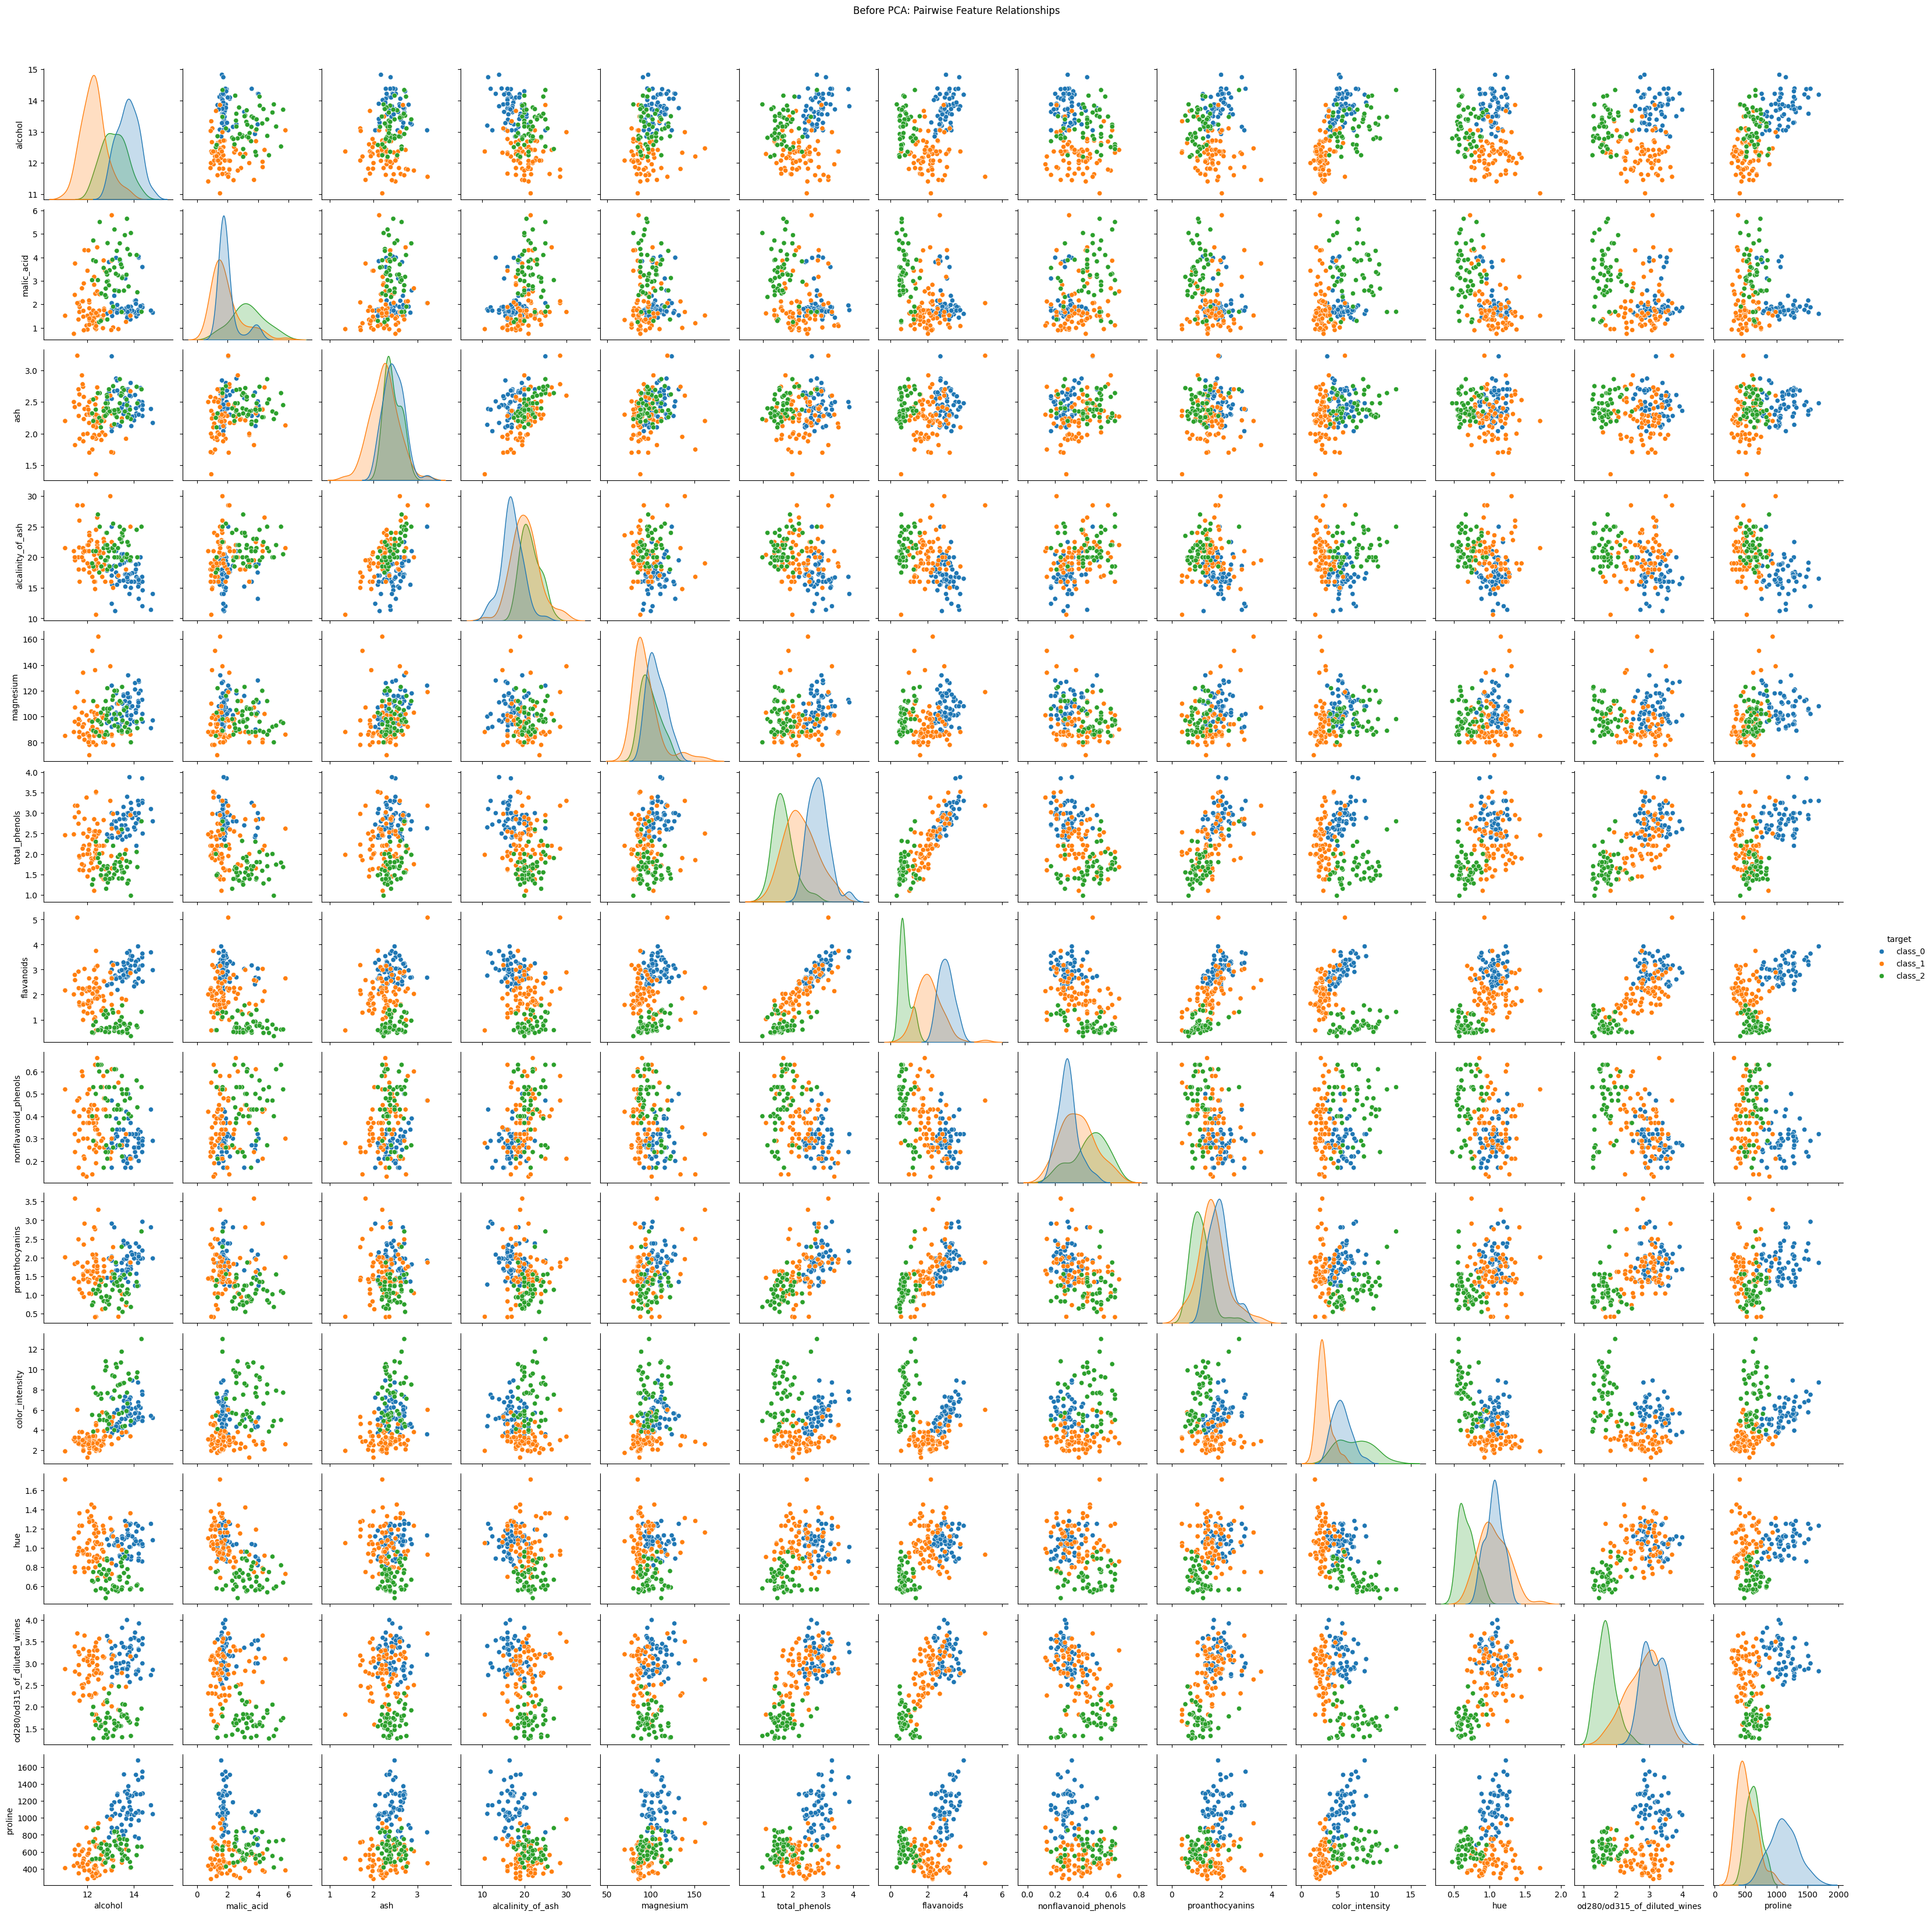

Pairplot generation skipped for brevity. Uncomment if needed.
📉 Plotting data after PCA (2D)...


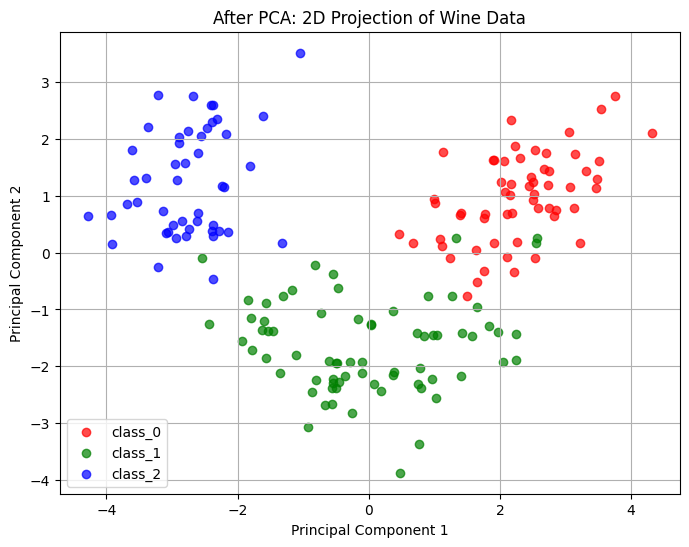


📊 Explained Variance by Principal Components:
PC1: 36.20%
PC2: 19.21%


In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine # Import load_wine

# Step 1: Load the Wine dataset instead of Pizza dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names


# Add label names for visualization
df_plot = pd.DataFrame(X, columns=feature_names)
df_plot['target'] = [target_names[i] for i in y]


# Step 3: Before PCA - Pairplot
print("🔍 Plotting feature relationships before PCA...")
#Pairplot can be time-consuming for many features, consider commenting out for large datasets
sns.pairplot(df_plot, hue='target', diag_kind='kde')
plt.suptitle("Before PCA: Pairwise Feature Relationships", y=1.02)
plt.show()
print("Pairplot generation skipped for brevity. Uncomment if needed.")


# Step 4: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 6: After PCA - 2D Scatter Plot
print("📉 Plotting data after PCA (2D)...")
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue'] # Assuming 3 classes in the dataset

for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                color=colors[i % len(colors)], label=target_name, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA: 2D Projection of Wine Data')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Explained variance
print("\n📊 Explained Variance by Principal Components:")
for i, variance in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {variance:.2%}")

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import altair as alt

# 1. Create a Synthetic Dataset on Cars (same as before)
np.random.seed(42)

data = {
    'Engine_Size': np.random.normal(2.0, 0.5, 100),
    'Horsepower': np.random.normal(150, 30, 100),
    'Fuel_Efficiency': np.random.normal(30, 5, 100),
    'Weight': np.random.normal(1500, 200, 100),
    'Price': np.random.normal(25000, 5000, 100)
}
df = pd.DataFrame(data)

# Ensure positive values where appropriate
df['Engine_Size'] = df['Engine_Size'].apply(lambda x: max(0.5, x))
df['Horsepower'] = df['Horsepower'].apply(lambda x: max(50, x))
df['Fuel_Efficiency'] = df['Fuel_Efficiency'].apply(lambda x: max(15, x))
df['Weight'] = df['Weight'].apply(lambda x: max(1000, x))
df['Price'] = df['Price'].apply(lambda x: max(10000, x))

# --- NEW: Create a Synthetic Target Variable for Classification ---
# Let's define 'Is_Efficient' based on a combination of Fuel_Efficiency and Horsepower.
# For example, cars with high fuel efficiency AND low-ish horsepower could be 'Efficient'.
# This is a simplified example; in a real scenario, you'd have actual labels.
df['Is_Efficient'] = ((df['Fuel_Efficiency'] > df['Fuel_Efficiency'].mean()) &
                      (df['Horsepower'] < df['Horsepower'].mean())).astype(int)

print("Dataset with Target Variable Head:")
print(df.head())
print("\nTarget Variable Value Counts:")
print(df['Is_Efficient'].value_counts())

# Separate features (X) and target (y)
X = df.drop('Is_Efficient', axis=1)
y = df['Is_Efficient']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Standardize the Data
# Fit scaler only on training data to prevent data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame for better feature name handling (optional but good practice)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)


# --- ACCURACY BEFORE PCA ---
print("\n--- Model Performance BEFORE PCA ---")
# Train a Logistic Regression model on the original scaled data
log_reg_original = LogisticRegression(random_state=42, solver='liblinear')
log_reg_original.fit(X_train_scaled_df, y_train)

# Make predictions
y_pred_original = log_reg_original.predict(X_test_scaled_df)

# Evaluate accuracy
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Accuracy with Original Features: {accuracy_original:.4f}")
print("Classification Report (Original Features):")
print(classification_report(y_test, y_pred_original))


# --- ACCURACY AFTER PCA ---
print("\n--- Model Performance AFTER PCA ---")
# Perform PCA on the scaled training data
# We'll use 3 components as discussed previously
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled) # Fit PCA on scaled training data
X_test_pca = pca.transform(X_test_scaled)     # Transform test data using the *same* PCA fit

# Create DataFrame for PCA-transformed data (optional)
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])

print("Explained Variance Ratio after PCA (3 components):")
print(pca.explained_variance_ratio_)
print(f"Total Explained Variance by 3 PCs: {pca.explained_variance_ratio_.sum():.4f}")

# Train a Logistic Regression model on the PCA-transformed data
log_reg_pca = LogisticRegression(random_state=42, solver='liblinear')
log_reg_pca.fit(X_train_pca_df, y_train)

# Make predictions
y_pred_pca = log_reg_pca.predict(X_test_pca_df)

# Evaluate accuracy
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy with PCA Features (3 components): {accuracy_pca:.4f}")
print("Classification Report (PCA Features):")
print(classification_report(y_test, y_pred_pca))

# --- Comparison ---
print("\n--- Accuracy Comparison ---")
print(f"Accuracy with Original Features: {accuracy_original:.4f}")
print(f"Accuracy with PCA Features (3 components): {accuracy_pca:.4f}")

if accuracy_pca > accuracy_original:
    print("\nPCA improved the classification accuracy.")
elif accuracy_pca < accuracy_original:
    print("\nPCA slightly reduced the classification accuracy.")
else:
    print("\nPCA had no significant impact on classification accuracy.")

Dataset with Target Variable Head:
   Engine_Size  Horsepower  Fuel_Efficiency       Weight         Price  \
0     2.248357  107.538878        31.788937  1334.200998  17027.861706   
1     1.930868  137.380640        32.803923  1387.963792  22003.124885   
2     2.323844  139.718565        35.415256  1649.458721  25026.218499   
3     2.761515  125.931682        35.269010  1622.074053  25234.902969   
4     1.882923  145.161429        23.111653  1495.819681  22749.672643   

   Is_Efficient  
0             1  
1             1  
2             1  
3             1  
4             0  

Target Variable Value Counts:
Is_Efficient
0    73
1    27
Name: count, dtype: int64

--- Model Performance BEFORE PCA ---
Accuracy with Original Features: 0.9000
Classification Report (Original Features):
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.86      0.75      0.80         8

    accuracy                           0.

📉 Plotting data after PCA (2D) for Wine dataset...


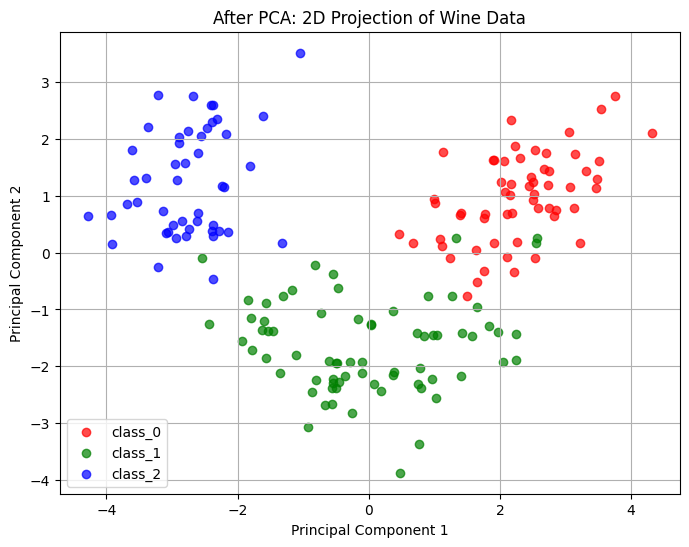


📊 Explained Variance by Principal Components (Wine dataset):
PC1: 36.20%
PC2: 19.21%


In [5]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the Wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target
feature_names_wine = wine.feature_names
target_names_wine = wine.target_names

# Create a DataFrame for pairplot before PCA
df_wine = pd.DataFrame(X_wine, columns=feature_names_wine)
df_wine['cultivar'] = [target_names_wine[i] for i in y_wine]

# Optional: Pairplot before PCA (can be time-consuming for many features)
# print("🔍 Plotting feature relationships before PCA (Wine dataset)...")
# sns.pairplot(df_wine, hue='cultivar', diag_kind='kde')
# plt.suptitle("Before PCA: Pairwise Feature Relationships (Wine)", y=1.02)
# plt.show()
# print("Pairplot generation complete.")


# Standardize the features
scaler_wine = StandardScaler()
X_scaled_wine = scaler_wine.fit_transform(X_wine)

# Apply PCA (reducing to 2 components for visualization)
pca_wine = PCA(n_components=2)
X_pca_wine = pca_wine.fit_transform(X_scaled_wine)

# After PCA - 2D Scatter Plot
print("📉 Plotting data after PCA (2D) for Wine dataset...")
plt.figure(figsize=(8, 6))
colors_wine = ['red', 'green', 'blue'] # Assuming 3 cultivars

for i, target_name in enumerate(target_names_wine):
    plt.scatter(X_pca_wine[y_wine == i, 0], X_pca_wine[y_wine == i, 1],
                color=colors_wine[i % len(colors_wine)], label=target_name, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA: 2D Projection of Wine Data')
plt.legend()
plt.grid(True)
plt.show()

# Explained variance
print("\n📊 Explained Variance by Principal Components (Wine dataset):")
for i, variance in enumerate(pca_wine.explained_variance_ratio_):
    print(f"PC{i+1}: {variance:.2%}")

In [6]:
df_wine.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline cultivar  
0                          3.92   1065.0  class_0  
1                          3.40   1050.0  class_0  
2                          3.17   1185.0  class_0  
3                          3.45   1480.0  class_0  
4                          2.93    735.0  class_0

Original Dataset Head:
   Engine_Size  Horsepower  Fuel_Efficiency       Weight         Price
0     2.248357  107.538878        31.788937  1334.200998  17027.861706
1     1.930868  137.380640        32.803923  1387.963792  22003.124885
2     2.323844  139.718565        35.415256  1649.458721  25026.218499
3     2.761515  125.931682        35.269010  1622.074053  25234.902969
4     1.882923  145.161429        23.111653  1495.819681  22749.672643

Original Dataset Description:
       Engine_Size  Horsepower  Fuel_Efficiency       Weight         Price
count   100.000000  100.000000       100.000000   100.000000    100.000000
mean      1.948077  150.669138        30.336545  1521.368024  24719.977647
std       0.454084   28.610069         5.385483   176.820283   5318.651609
min       0.690127   92.436864        15.000000  1075.220855  13490.394176
25%       1.699547  125.830184        26.722782  1386.596134  20541.581817
50%       1.936522  152.523215        30.488479  1510.031473  24620.50

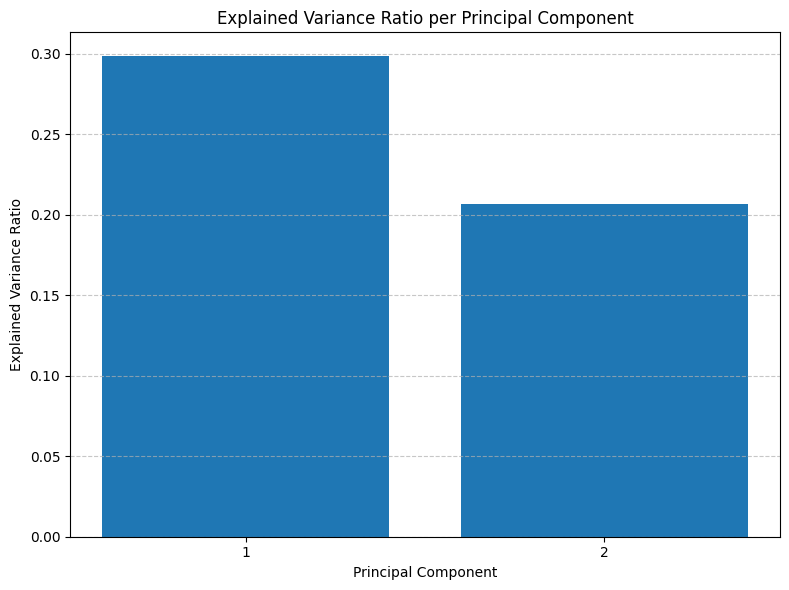


PCA analysis complete. Check 'explained_variance_ratio.png' and 'pca_scatter_plot.html' for visualizations.


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import altair as alt

np.random.seed(42)

data = {
    'Engine_Size': np.random.normal(2.0, 0.5, 100),
    'Horsepower': np.random.normal(150, 30, 100),
    'Fuel_Efficiency': np.random.normal(30, 5, 100),
    'Weight': np.random.normal(1500, 200, 100),
    'Price': np.random.normal(25000, 5000, 100)
}
df = pd.DataFrame(data)

df['Engine_Size'] = df['Engine_Size'].apply(lambda x: max(0.5, x))
df['Horsepower'] = df['Horsepower'].apply(lambda x: max(50, x))
df['Fuel_Efficiency'] = df['Fuel_Efficiency'].apply(lambda x: max(15, x))
df['Weight'] = df['Weight'].apply(lambda x: max(1000, x))
df['Price'] = df['Price'].apply(lambda x: max(10000, x))

print("Original Dataset Head:")
print(df.head())
print("\nOriginal Dataset Description:")
print(df.describe())


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
print("\nScaled Dataset Head:")
print(scaled_df.head())

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)


principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print("\nPrincipal Components DataFrame Head:")
print(principal_df.head())

explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained Variance Ratio of Principal Components:")
print(explained_variance_ratio)
print(f"Total explained variance by 2 components: {explained_variance_ratio.sum():.2f}")


plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('explained_variance_ratio.png')
plt.show()


chart = alt.Chart(principal_df).mark_point().encode(
    x='PC1',
    y='PC2',
    tooltip=['PC1', 'PC2']
).properties(
    title='PCA of Car Dataset (First Two Principal Components)'
).interactive()

chart.save('pca_scatter_plot.html')


print("\nPCA analysis complete. Check 'explained_variance_ratio.png' and 'pca_scatter_plot.html' for visualizations.")

Original Dataset Head:
   Engine_Size  Horsepower  Fuel_Efficiency       Weight         Price
0     2.248357  107.538878        31.788937  1334.200998  17027.861706
1     1.930868  137.380640        32.803923  1387.963792  22003.124885
2     2.323844  139.718565        35.415256  1649.458721  25026.218499
3     2.761515  125.931682        35.269010  1622.074053  25234.902969
4     1.882923  145.161429        23.111653  1495.819681  22749.672643

Principal Components DataFrame Head (first 5 rows):
        PC1       PC2       PC3
0 -2.228342 -0.215935 -0.967739
1 -0.901234 -0.224468 -0.105363
2 -0.584891  1.290146  0.410873
3 -1.307969  1.485416  0.369303
4  0.215344 -0.820301 -1.027044

Explained Variance Ratio of Principal Components:
[0.29830763 0.20664057 0.19976627]
Total explained variance by 3 components: 0.70


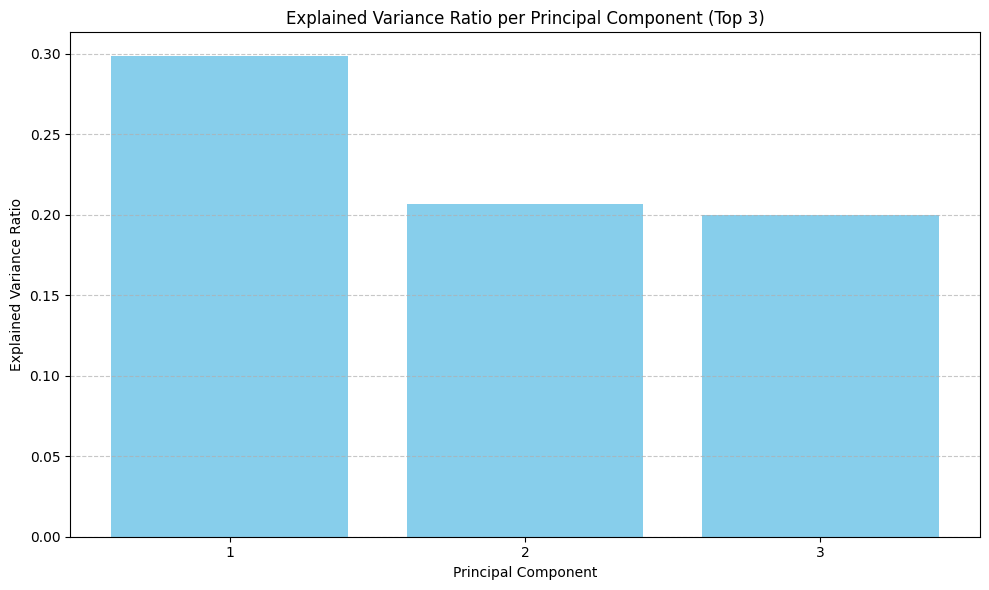


PCA analysis with 3 components complete. Check the generated HTML and PNG files for visualizations:
- 'explained_variance_ratio_3_components.png'
- 'pca_scatter_plot_pc1_pc2.html'
- 'pca_scatter_plot_pc1_pc3.html'
- 'pca_scatter_plot_pc2_pc3.html'


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import altair as alt

np.random.seed(42)

data = {
    'Engine_Size': np.random.normal(2.0, 0.5, 100),
    'Horsepower': np.random.normal(150, 30, 100),
    'Fuel_Efficiency': np.random.normal(30, 5, 100),
    'Weight': np.random.normal(1500, 200, 100),
    'Price': np.random.normal(25000, 5000, 100)
}
df = pd.DataFrame(data)

df['Engine_Size'] = df['Engine_Size'].apply(lambda x: max(0.5, x))
df['Horsepower'] = df['Horsepower'].apply(lambda x: max(50, x))
df['Fuel_Efficiency'] = df['Fuel_Efficiency'].apply(lambda x: max(15, x))
df['Weight'] = df['Weight'].apply(lambda x: max(1000, x))
df['Price'] = df['Price'].apply(lambda x: max(10000, x))

print("Original Dataset Head:")
print(df.head())

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
print("\nPrincipal Components DataFrame Head (first 5 rows):")
print(principal_df.head())

explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained Variance Ratio of Principal Components:")
print(explained_variance_ratio)
print(f"Total explained variance by 3 components: {explained_variance_ratio.sum():.2f}")


plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component (Top 3)')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('explained_variance_ratio_3_components.png')
plt.show()


# PC1 vs PC2
chart_pc1_pc2 = alt.Chart(principal_df).mark_point().encode(
    x='PC1',
    y='PC2',
    tooltip=['PC1', 'PC2', 'PC3']
).properties(
    title='PCA of Car Dataset: PC1 vs PC2'
).interactive()
chart_pc1_pc2.save('pca_scatter_plot_pc1_pc2.html')

# PC1 vs PC3
chart_pc1_pc3 = alt.Chart(principal_df).mark_point().encode(
    x='PC1',
    y='PC3',
    tooltip=['PC1', 'PC2', 'PC3']
).properties(
    title='PCA of Car Dataset: PC1 vs PC3'
).interactive()
chart_pc1_pc3.save('pca_scatter_plot_pc1_pc3.html')

# PC2 vs PC3
chart_pc2_pc3 = alt.Chart(principal_df).mark_point().encode(
    x='PC2',
    y='PC3',
    tooltip=['PC1', 'PC2', 'PC3']
).properties(
    title='PCA of Car Dataset: PC2 vs PC3'
).interactive()
chart_pc2_pc3.save('pca_scatter_plot_pc2_pc3.html')

print("\nPCA analysis with 3 components complete. Check the generated HTML and PNG files for visualizations:")
print("- 'explained_variance_ratio_3_components.png'")
print("- 'pca_scatter_plot_pc1_pc2.html'")
print("- 'pca_scatter_plot_pc1_pc3.html'")
print("- 'pca_scatter_plot_pc2_pc3.html'")



📉 Plotting data after PCA (2D) for Iris dataset...


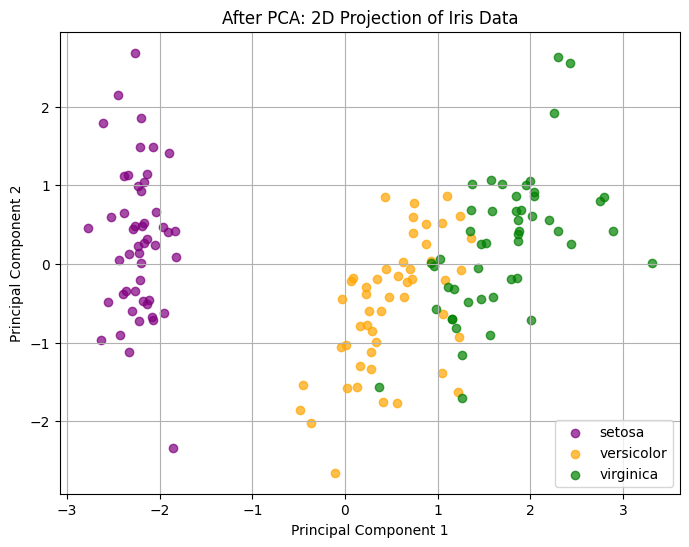


📊 Explained Variance by Principal Components (Iris dataset):
PC1: 72.96%
PC2: 22.85%


In [9]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names_iris = iris.feature_names
target_names_iris = iris.target_names

# Standardize the features
scaler_iris = StandardScaler()
X_scaled_iris = scaler_iris.fit_transform(X_iris)

# Apply PCA (reducing to 2 components for visualization)
pca_iris = PCA(n_components=2)
X_pca_iris = pca_iris.fit_transform(X_scaled_iris)

# After PCA - 2D Scatter Plot
print("📉 Plotting data after PCA (2D) for Iris dataset...")
plt.figure(figsize=(8, 6))
colors_iris = ['purple', 'orange', 'green'] # Assuming 3 classes

for i, target_name in enumerate(target_names_iris):
    plt.scatter(X_pca_iris[y_iris == i, 0], X_pca_iris[y_iris == i, 1],
                color=colors_iris[i % len(colors_iris)], label=target_name, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA: 2D Projection of Iris Data')
plt.legend()
plt.grid(True)
plt.show()

# Explained variance
print("\n📊 Explained Variance by Principal Components (Iris dataset):")
for i, variance in enumerate(pca_iris.explained_variance_ratio_):
    print(f"PC{i+1}: {variance:.2%}")

In [10]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {
    'col1': np.random.rand(100),
    'col2': np.random.randint(1, 100, 100),
    'col3': np.random.choice(['A', 'B', 'C'], 100)
}
sample_df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_filename = 'sample_data.csv'
sample_df.to_csv(csv_filename, index=False)

print(f"Sample CSV file '{csv_filename}' created successfully.")

Sample CSV file 'sample_data.csv' created successfully.
